In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import hddm 
from patsy import dmatrix 
import numpy as np
from sys import platform
# print(hddm.__version__)

%matplotlib inline
# plt.rcParams['figure.figsize'] = 30, 10
sns.set_context("notebook", font_scale=10, rc={"lines.linewidth": 10, "lines.markersize": 30})

/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/IPython/parallel.py:13: ShimWarning: The `IPython.parallel` package has been deprecated since IPython 4.0. You should import from ipyparallel instead.
  "You should import from ipyparallel instead.", ShimWarning)


## Pre-processing

In [2]:
if platform == 'linux':
    home = '/home/krista/'
elif platform == 'darwin': 
    home = '/Users/67981492/'

In [3]:
!pwd
write_dir = home + 'Dropbox/volatileValues/simple_rt_experiment_probabilityC/analysis/hddm_reg_models/'

/home/krista/Dropbox/volatileValues/simple_rt_experiment_probabilityC/analysis/analysis_nbs


In [4]:
all_sim_data = hddm.load_csv(home + 'Dropbox/volatileValues/simple_rt_experiment_probabilityC/analysis/aggregated_data/probC_sim_learning_signals_processed.csv')

In [5]:
all_sim_data.head(10)

,Unnamed: 0,cpp,target_B,choice_B,cp,gen_drift,gen_bound,rt,acc,subj_idx,ID,cond,id_choices,correct_id_choices,b_t0,b_t1,ideal_B,B_ideal_target,B_nonideal_target
0,0,0.025334,0.000000,0.000000,0,0.013572,0.416406,0.700,False,0,761,lc,0,1,0.000000,0.000000,0.000000,0.000000,0.000000
1,1,0.022106,0.000000,0.000000,0,0.013572,0.525334,0.700,False,0,761,lc,0,1,0.000000,0.038001,0.038001,0.038001,0.000000
2,2,0.020935,0.038001,-0.038001,0,0.013572,0.522106,0.700,False,0,761,lc,0,1,0.000000,0.070320,0.070320,0.070320,0.000000
3,3,0.020345,0.070320,-0.070320,0,0.051574,0.520935,0.700,False,0,761,lc,0,1,0.000000,0.100251,0.100251,0.100251,0.000000
4,4,0.646769,0.100251,-0.100251,0,0.121894,0.520345,0.700,False,0,761,lc,0,1,0.000000,0.128728,0.128728,0.128728,0.000000
5,5,0.072232,0.128728,-0.128728,0,0.222144,1.146769,0.700,False,0,761,lc,0,1,2.375416,1.015624,-1.359791,1.015624,2.375416
6,6,0.026769,-1.359791,1.359791,0,0.350872,0.572232,0.700,False,0,761,lc,0,1,0.651961,1.050611,0.398651,1.050611,0.651961
7,7,0.022626,0.398651,-0.398651,0,1.000000,0.526769,0.172,False,0,761,lc,0,1,0.360797,1.062641,0.701844,1.062641,0.360797
8,8,0.021194,0.701844,-0.701844,0,0.601349,0.522626,0.332,False,0,761,lc,0,1,0.243166,1.072537,0.829371,1.072537,0.243166
9,9,0.020494,0.829371,-0.829371,0,0.100495,0.521194,0.700,False,0,761,lc,0,1,0.179307,1.081596,0.902289,1.081596,0.179307


In [6]:
all_sim_data.columns = all_sim_data.columns.str.strip()
all_sim_data.head()

,Unnamed: 0,cpp,target_B,choice_B,cp,gen_drift,gen_bound,rt,acc,subj_idx,ID,cond,id_choices,correct_id_choices,b_t0,b_t1,ideal_B,B_ideal_target,B_nonideal_target
0,0,0.025334,0.000000,0.000000,0,0.013572,0.416406,0.7,False,0,761,lc,0,1,0.0,0.000000,0.000000,0.000000,0.0
1,1,0.022106,0.000000,0.000000,0,0.013572,0.525334,0.7,False,0,761,lc,0,1,0.0,0.038001,0.038001,0.038001,0.0
2,2,0.020935,0.038001,-0.038001,0,0.013572,0.522106,0.7,False,0,761,lc,0,1,0.0,0.070320,0.070320,0.070320,0.0
3,3,0.020345,0.070320,-0.070320,0,0.051574,0.520935,0.7,False,0,761,lc,0,1,0.0,0.100251,0.100251,0.100251,0.0
4,4,0.646769,0.100251,-0.100251,0,0.121894,0.520345,0.7,False,0,761,lc,0,1,0.0,0.128728,0.128728,0.128728,0.0


In [7]:
all_sim_data.columns

Index(['Unnamed: 0', 'cpp', 'target_B', 'choice_B', 'cp', 'gen_drift',
       'gen_bound', 'rt', 'acc', 'subj_idx', 'ID', 'cond', 'id_choices',
       'correct_id_choices', 'b_t0', 'b_t1', 'ideal_B', 'B_ideal_target',
       'B_nonideal_target'],
      dtype='object')

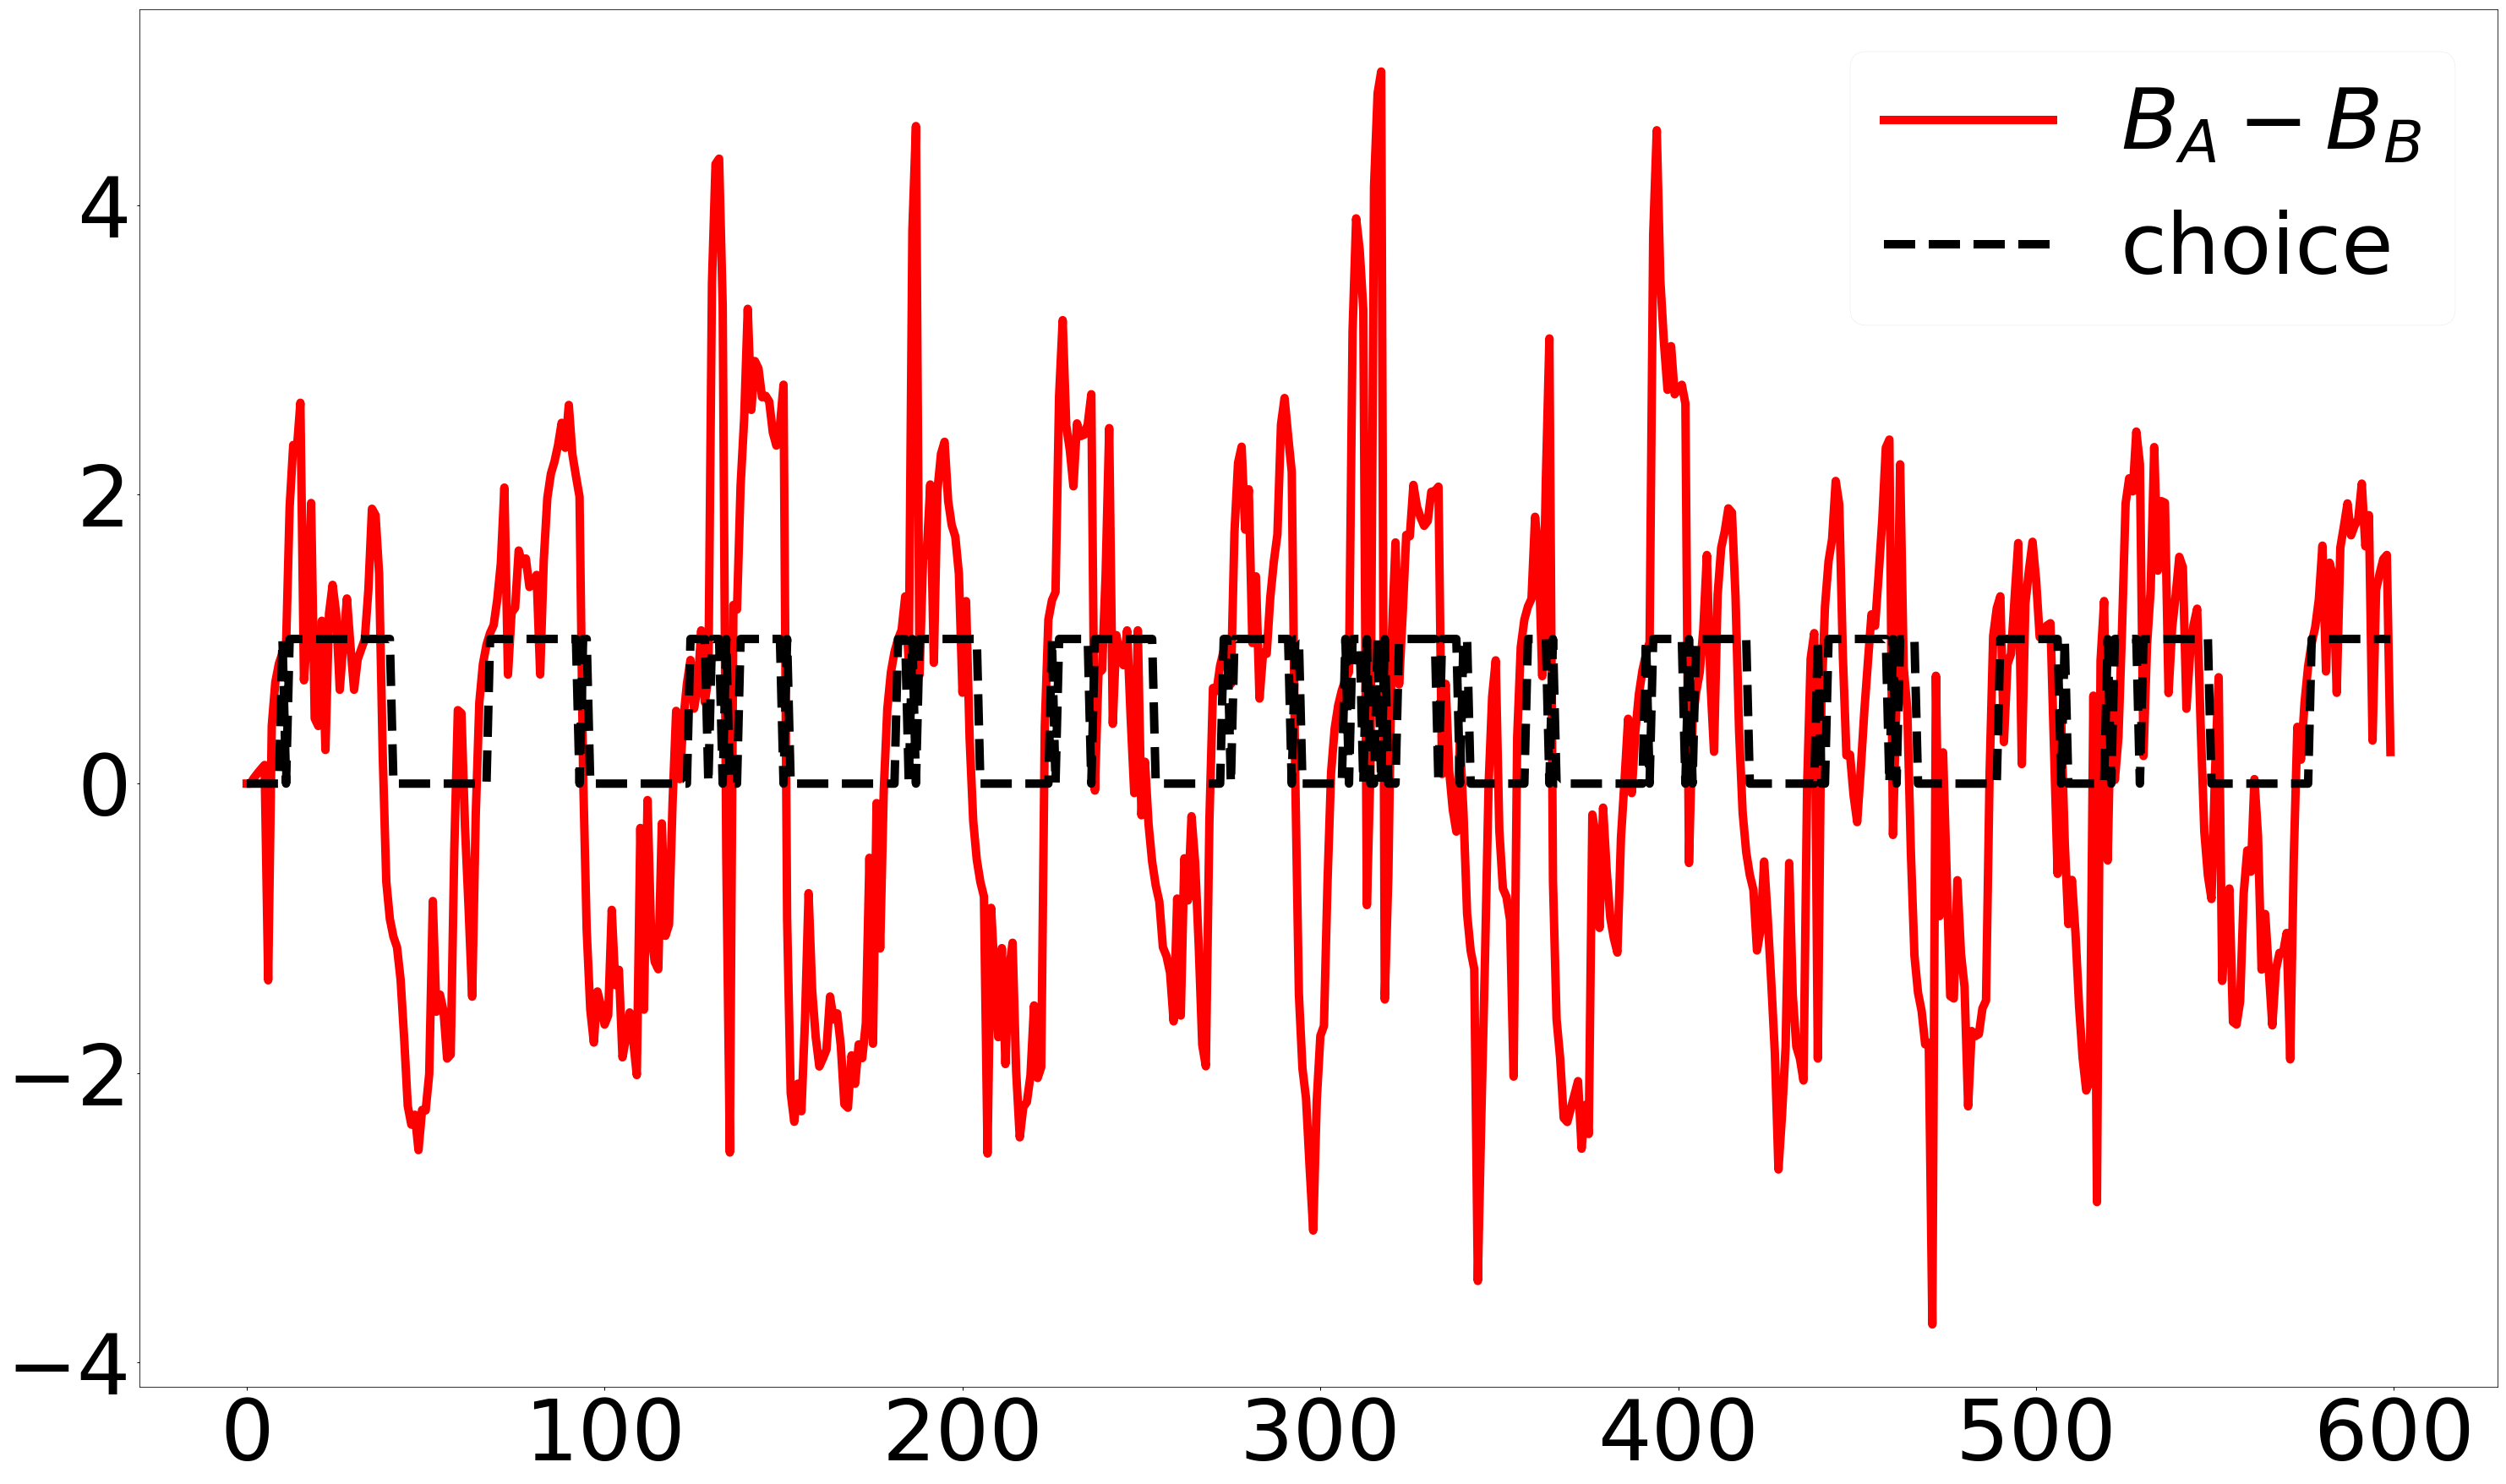

In [8]:
plt.figure(figsize=(50,30))
plt.plot(all_sim_data.target_B[0:600], 'r', label='$B_{A} - B_{B}$')
plt.plot(all_sim_data.id_choices[0:600], 'k--', label='choice')
plt.legend()

Text(0,0.5,'$B_{choice} - B_{nonchoice}$')

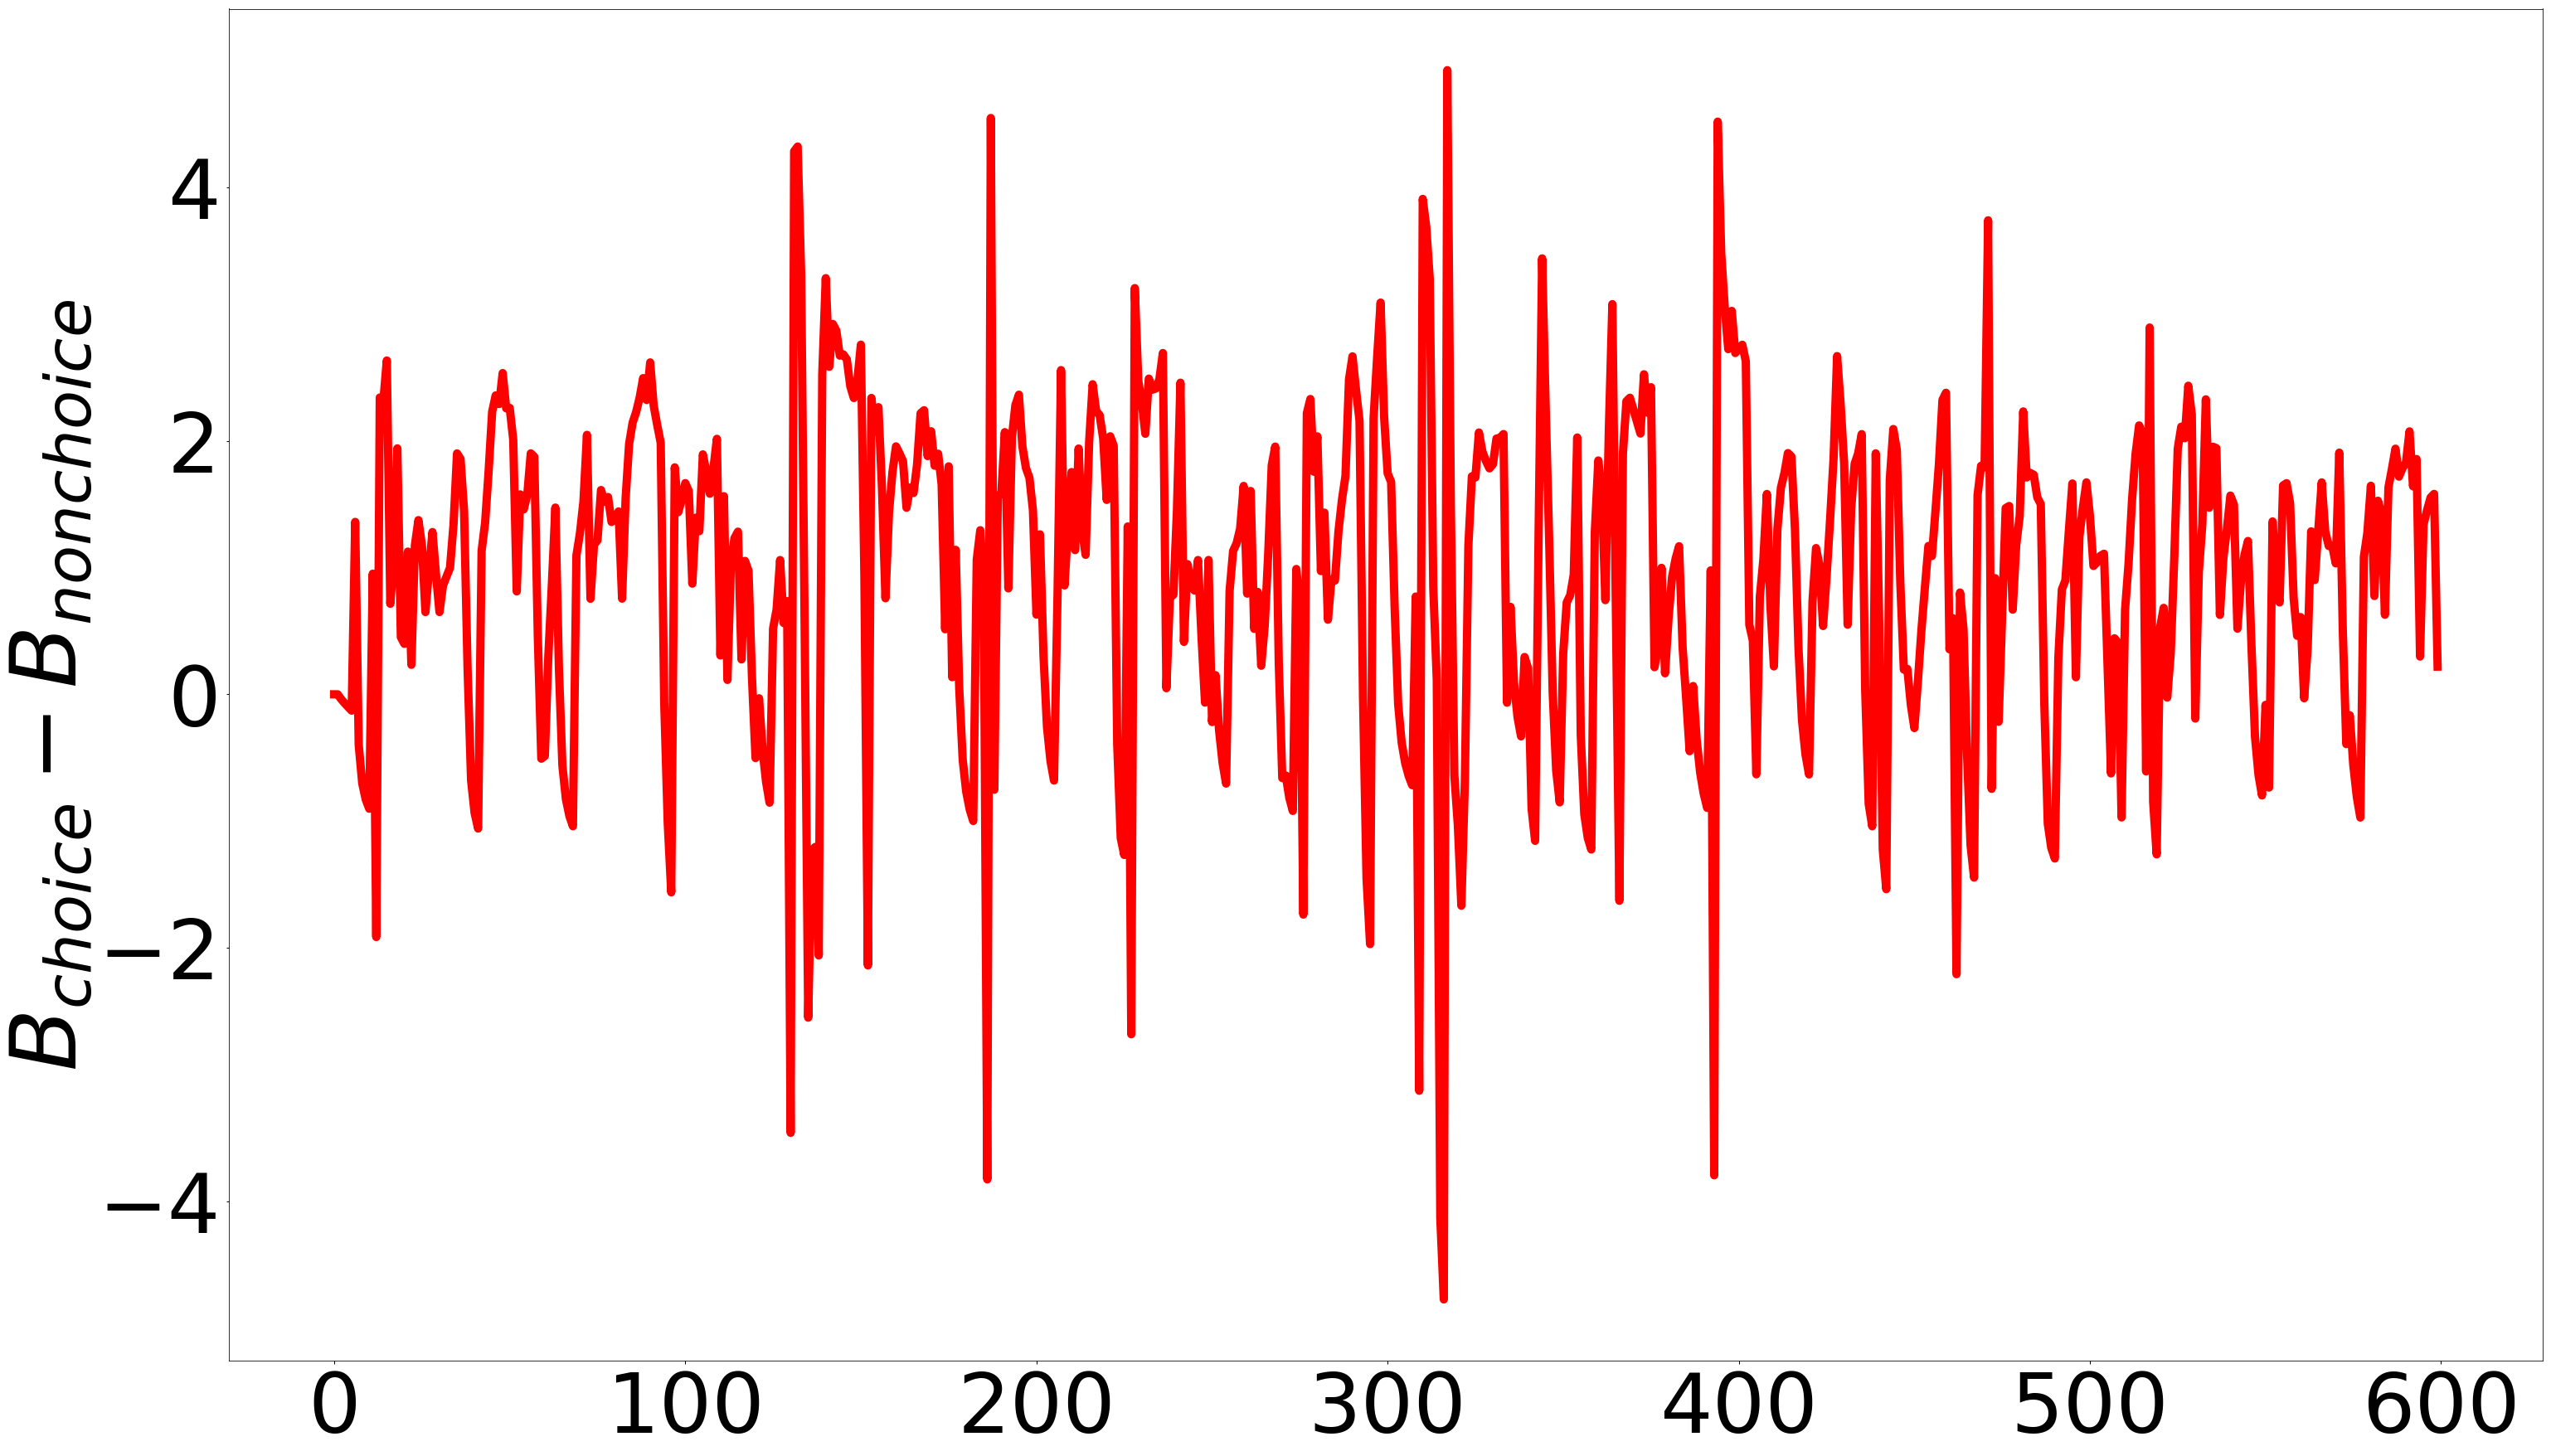

In [9]:
plt.figure(figsize=(50,30))
plt.plot(all_sim_data.choice_B[0:600], 'r')
plt.ylabel('$B_{choice} - B_{nonchoice}$')

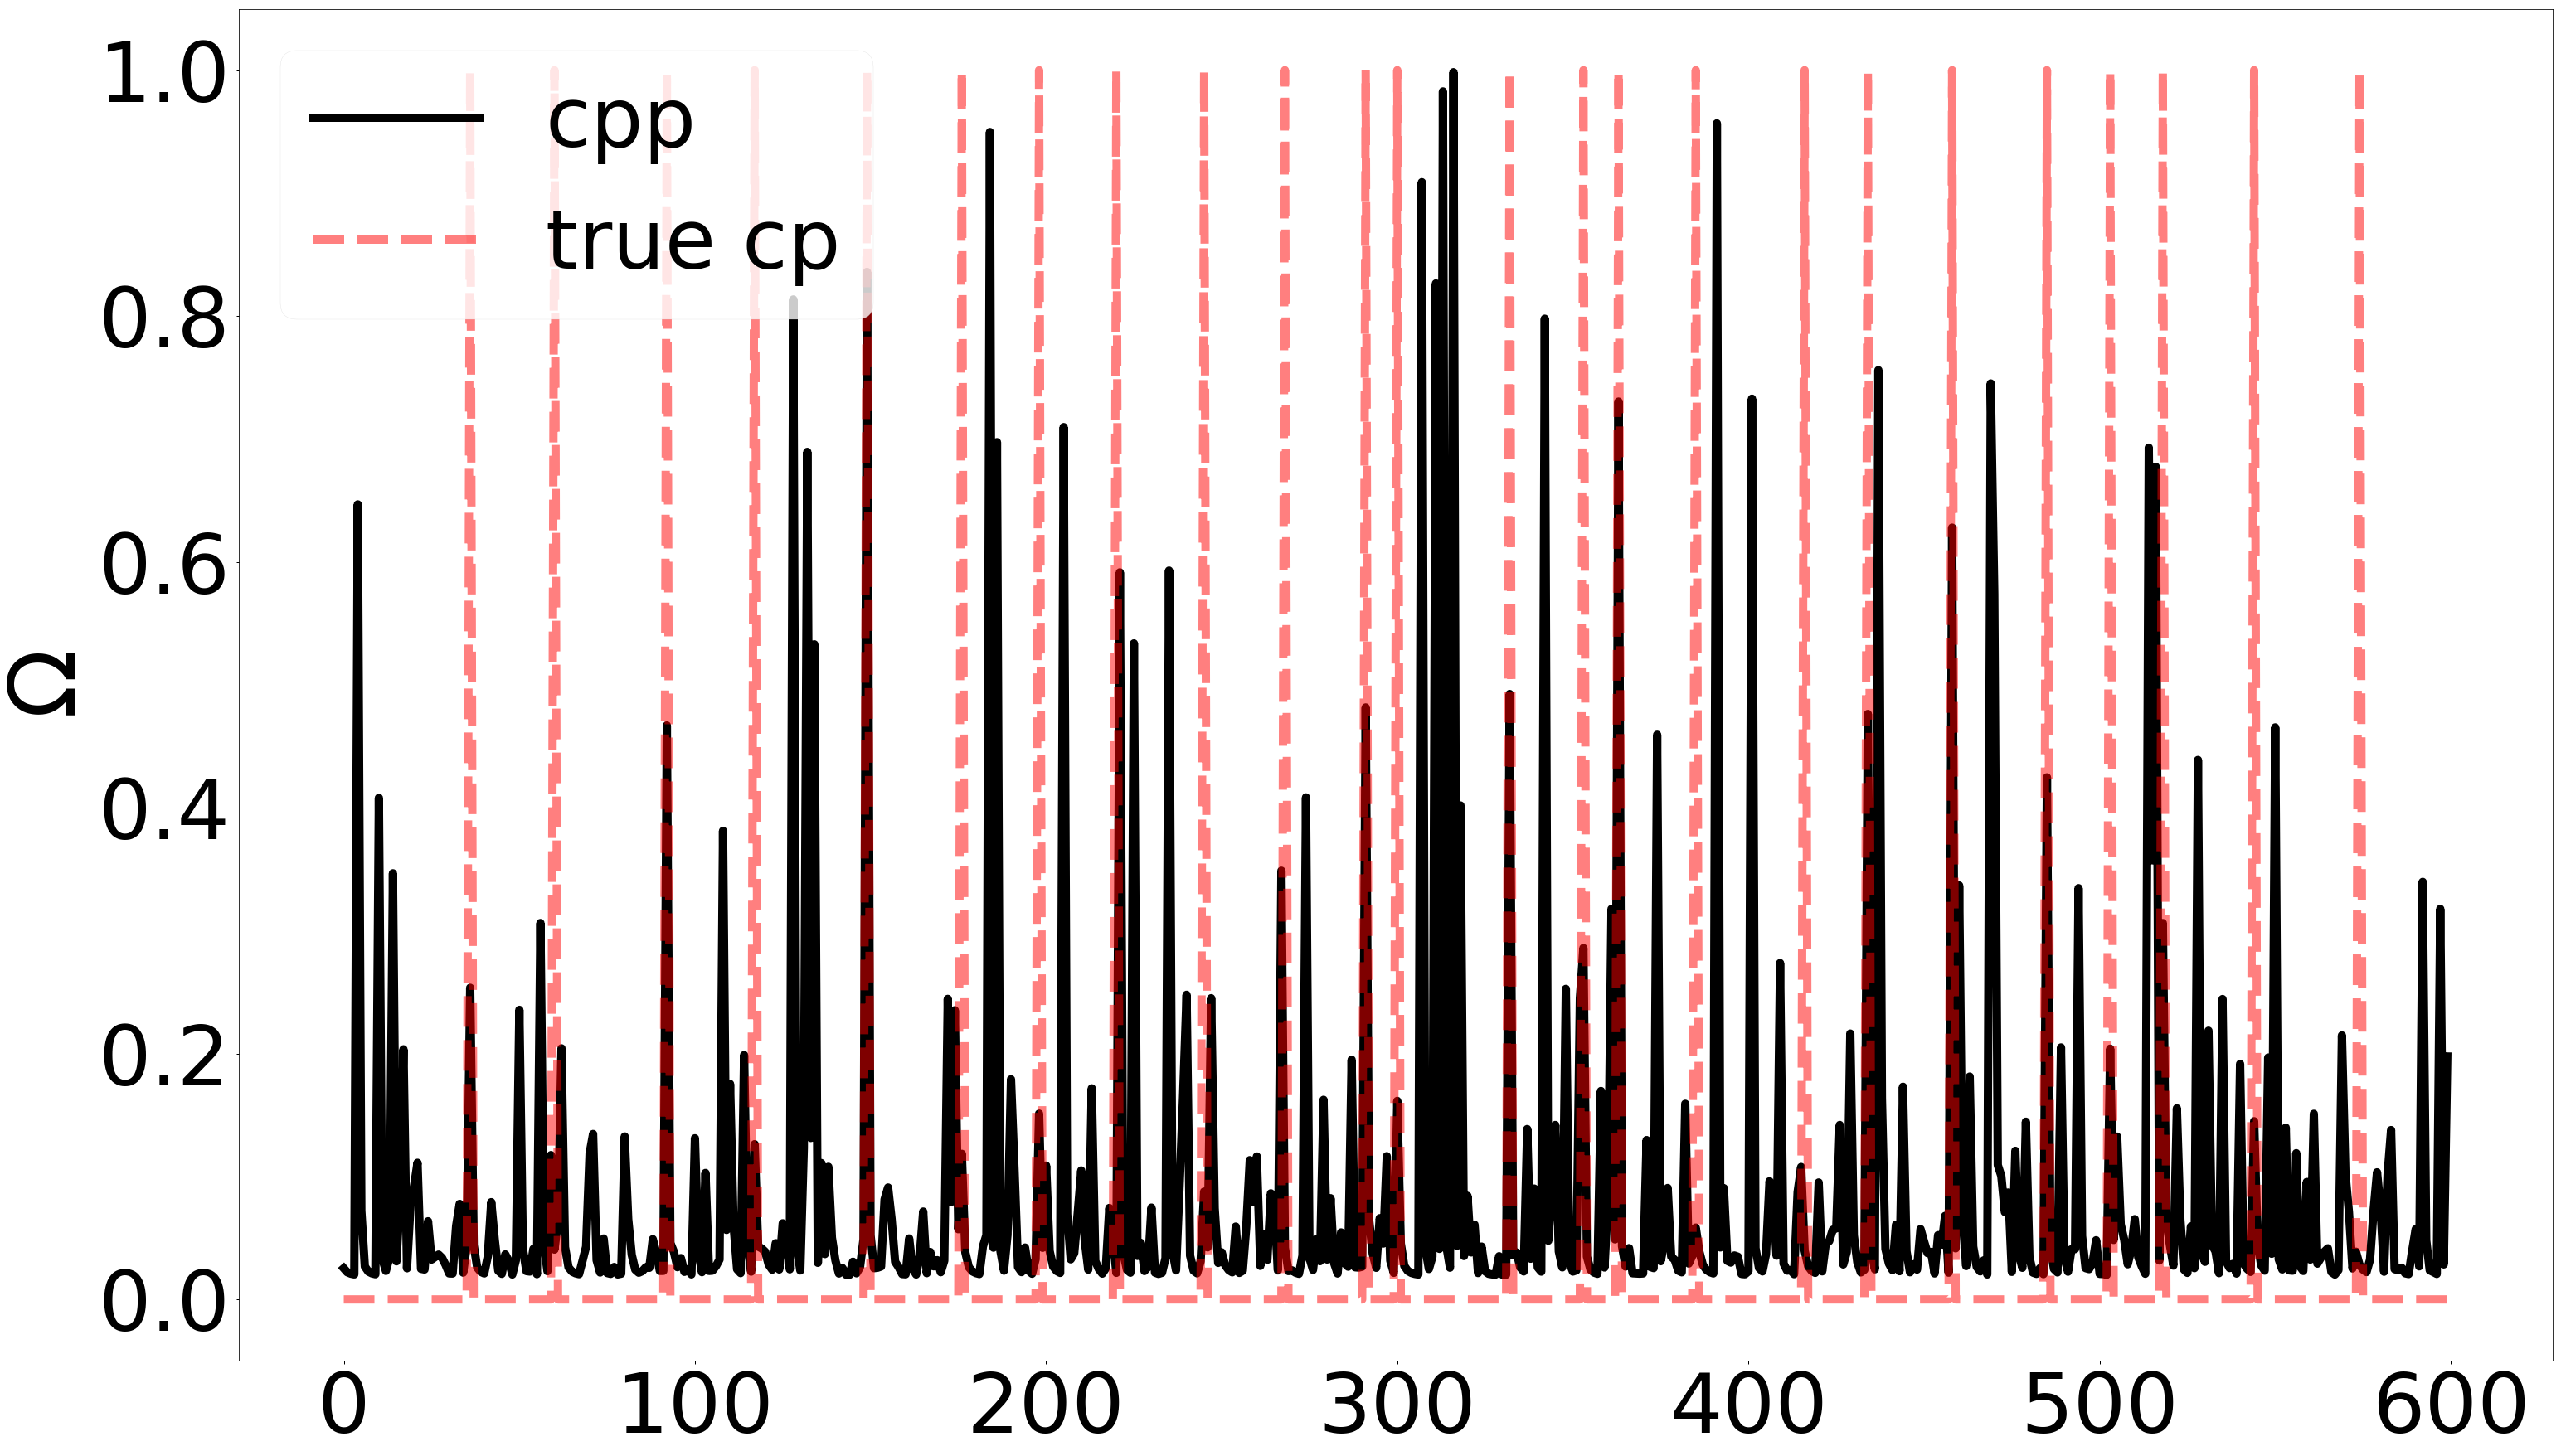

In [10]:
plt.figure(figsize=(50,30))
plt.plot(all_sim_data.cpp[0:600], 'k', label='cpp')
plt.plot(all_sim_data.cp[0:600], 'r--', alpha=0.5, label='true cp')
plt.ylabel('$\Omega$')
plt.legend(frameon=1,loc='upper left')

In [11]:
#use target choice as response 
#include correct target choice as stimulus 
all_sim_data = all_sim_data.rename(index=str, columns={"id_choices": "response", 
                                                       "correct_id_choices": "stimulus"})
all_sim_data = all_sim_data[['response', 'stimulus', 'rt', 'cond', 'subj_idx', 'target_B', 'cpp']] 
# #use target-based belief in reward difference (b_t0 - b_t1)
all_sim_data = all_sim_data.rename(index=str, columns={'target_B': 'B'})
all_sim_data = all_sim_data[(all_sim_data.rt<0.6)]
all_sim_data.reset_index(drop=True, inplace=True)

In [12]:
all_sim_data['cond'] = all_sim_data['cond'].str.strip()
all_sim_data.head()

,response,stimulus,rt,cond,subj_idx,B,cpp
0,0,1,0.172,lc,0,0.398651,0.022626
1,0,1,0.332,lc,0,0.701844,0.021194
2,1,1,0.422,lc,0,0.902289,0.408017
3,1,1,0.352,lc,0,1.914075,0.023195
4,1,1,0.342,lc,0,2.340844,0.034013


In [13]:
np.unique(all_sim_data.subj_idx), np.unique(all_sim_data.cond)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]),
 array(['hc', 'hv', 'lc', 'lv'], dtype=object))

In [14]:
#these are no longer error flipped but stimulus flipped 
# all_sim_data = hddm.utils.flip_errors(all_sim_data)

In [15]:
# plt.rcParams['figure.figsize'] = 30, 10
# sns.set(font_scale=5)
# fig = plt.figure()
# ax = fig.add_subplot(111, xlabel='RT', ylabel='count', title='RT distributions')
# for i, subj_data in all_sim_data.groupby('subj_idx'):
#     subj_data.rt.hist(bins=20, histtype='stepfilled', ax=ax)

In [16]:
all_sim_data.columns

Index(['response', 'stimulus', 'rt', 'cond', 'subj_idx', 'B', 'cpp'], dtype='object')

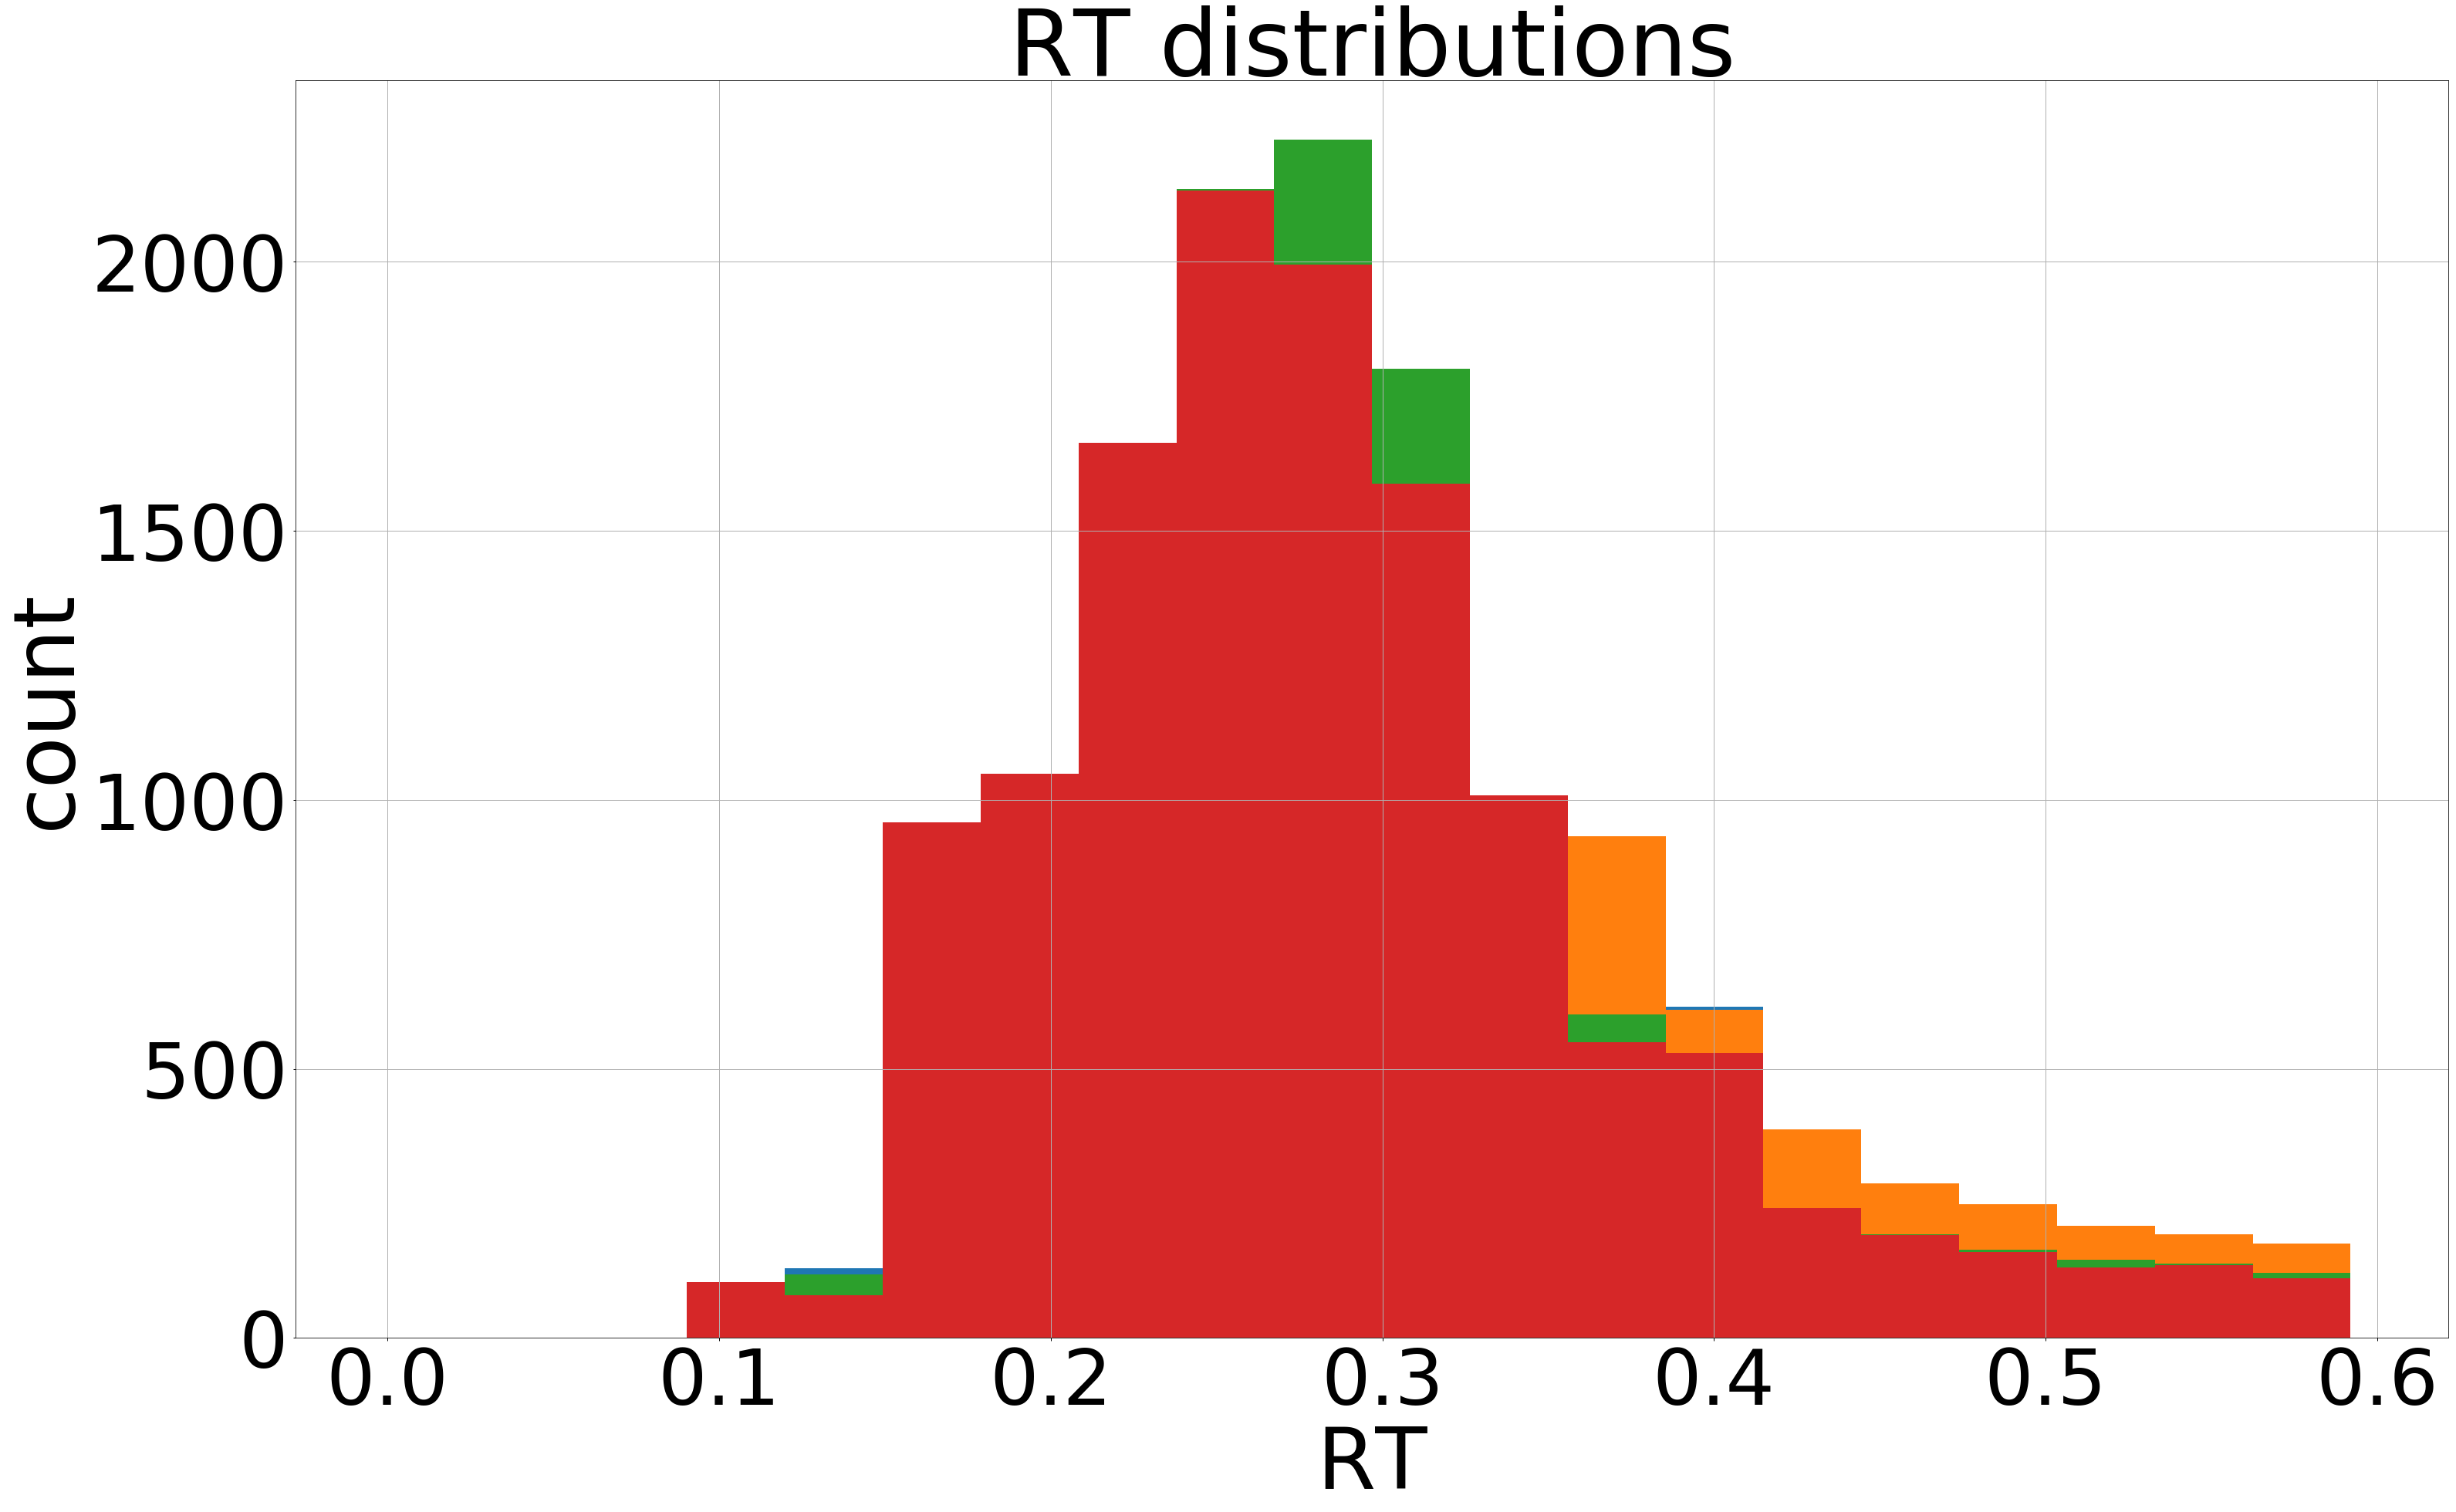

In [20]:
fig=plt.figure(figsize=(50,30))
ax = fig.add_subplot(111, xlabel='RT', ylabel='count', title='RT distributions')
for i, subj_data in all_sim_data.groupby('cond'):
    subj_data.rt.hist(bins=20, histtype='stepfilled', ax=ax)

Text(0,0.5,'B')

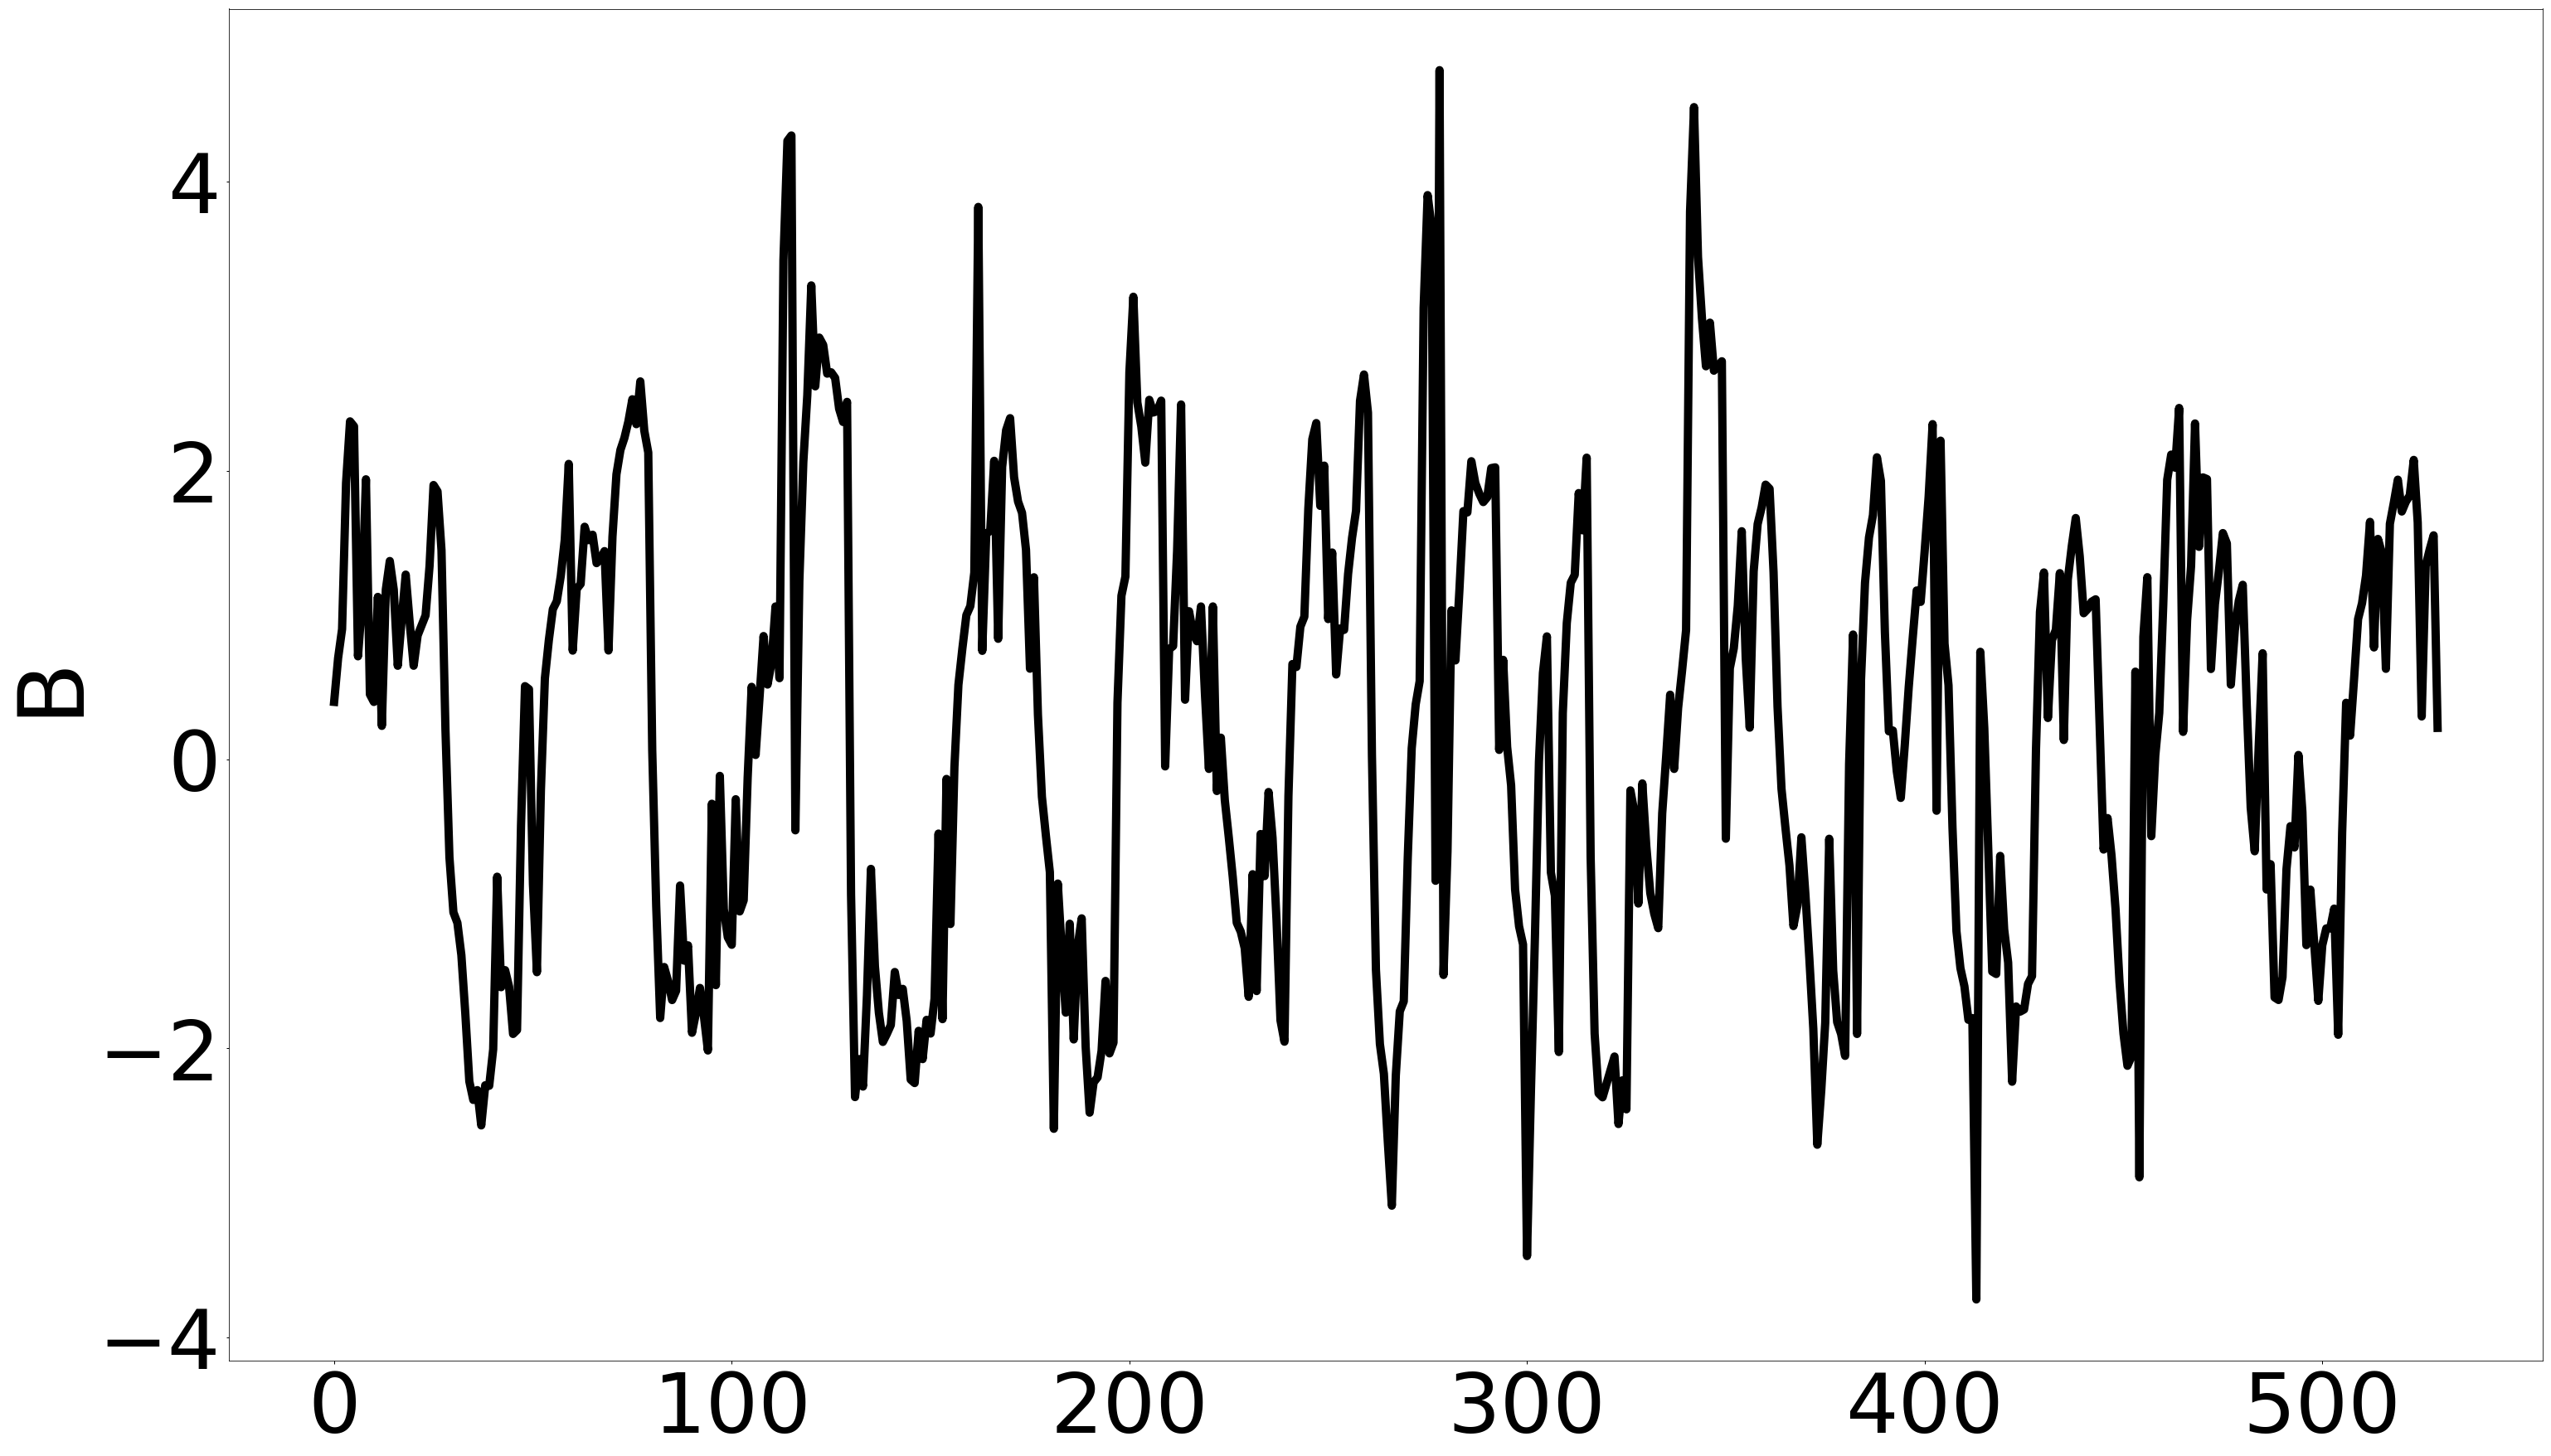

In [22]:
plt.figure(figsize=(50,30))

plt.plot(all_sim_data.B[(all_sim_data.subj_idx == 0) & (all_sim_data.cond == 'lc')], 'k')
plt.ylabel('B')

Text(0,0.5,'stimulus selected')

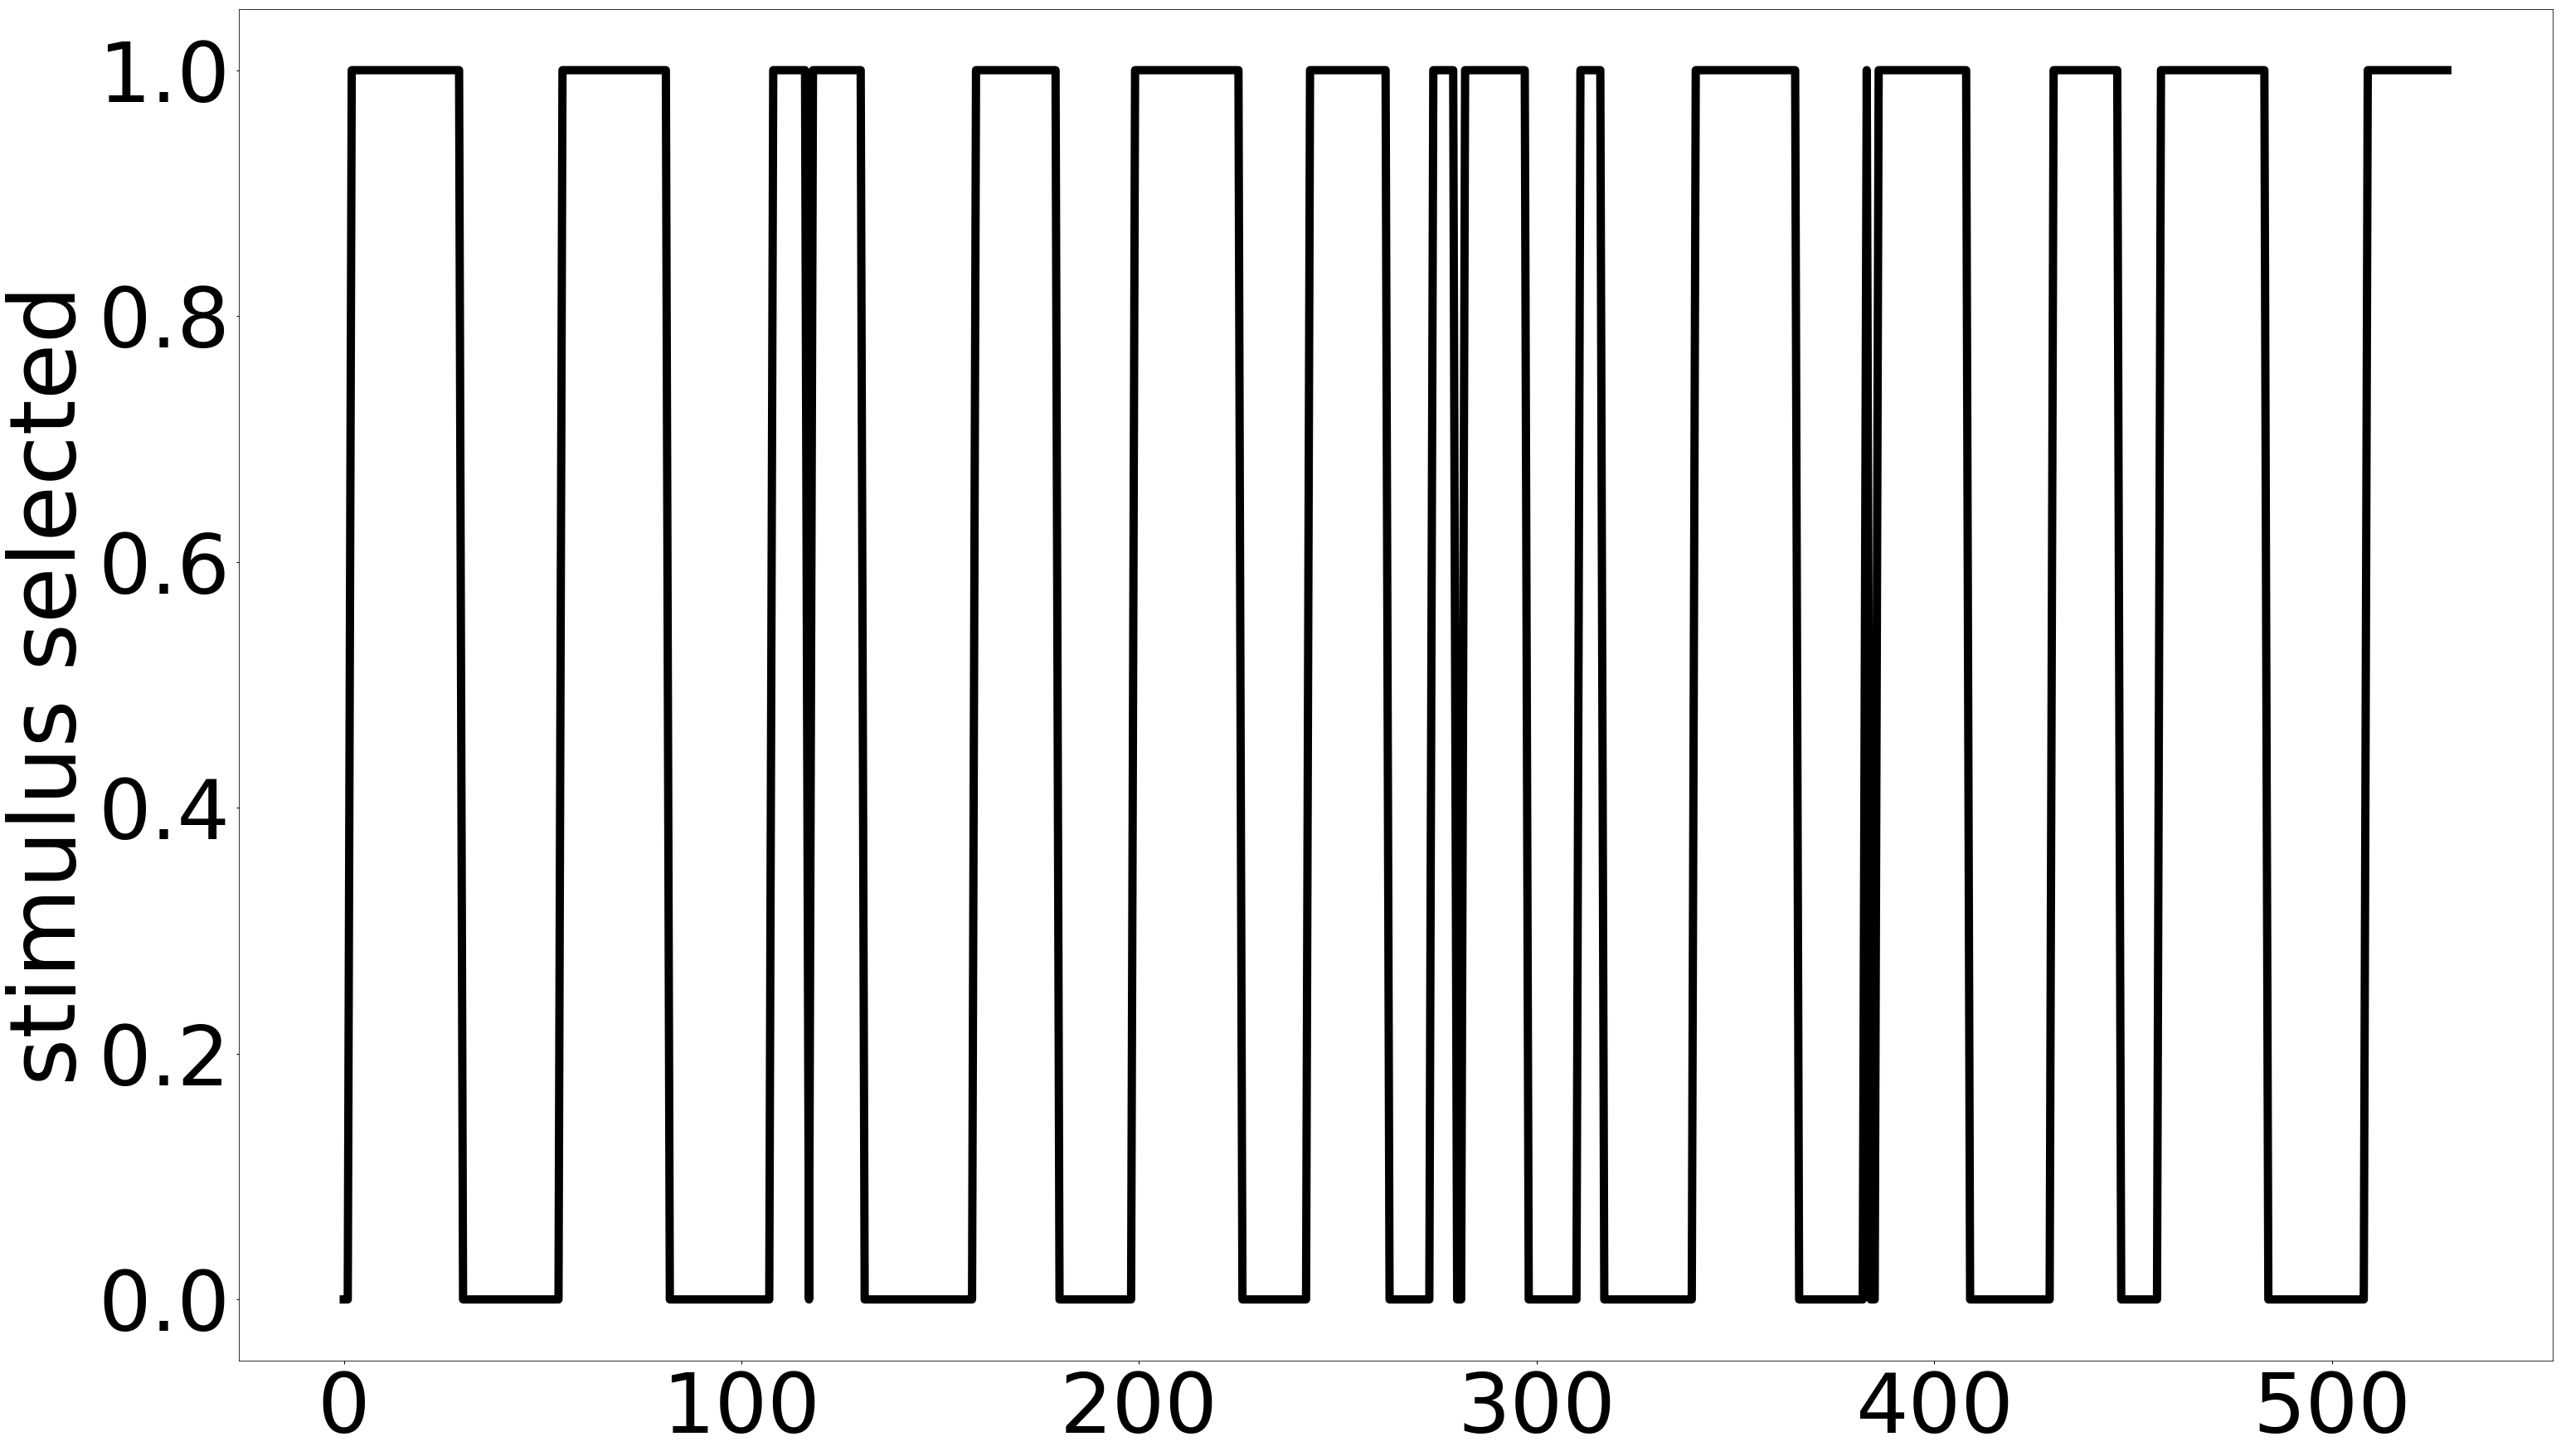

In [23]:
plt.figure(figsize=(50,30))

plt.plot(all_sim_data.response[(all_sim_data.subj_idx == 0) & (all_sim_data.cond == 'lc')], 'k')
plt.ylabel('stimulus selected')

In [24]:
all_sim_data.columns

Index(['response', 'stimulus', 'rt', 'cond', 'subj_idx', 'B', 'cpp'], dtype='object')

Text(0,0.5,'simulated rt')

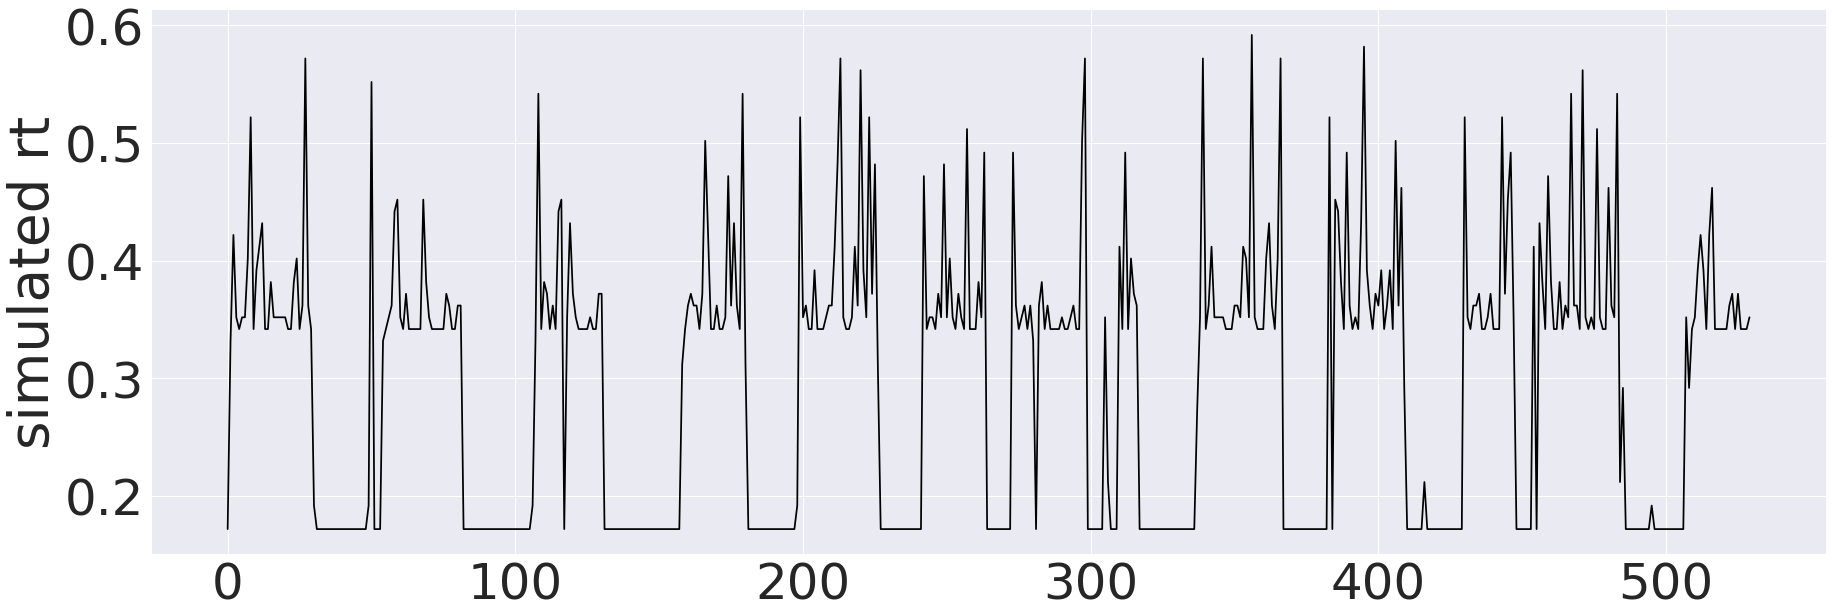

In [25]:
plt.rcParams['figure.figsize'] = 30, 10
sns.set(font_scale=5)
fig = plt.figure()
plt.plot(all_sim_data.rt[(all_sim_data.subj_idx == 0) & (all_sim_data.cond == 'lc')], 'k')
plt.ylabel('simulated rt')

Text(0,0.5,'correct stimulus')

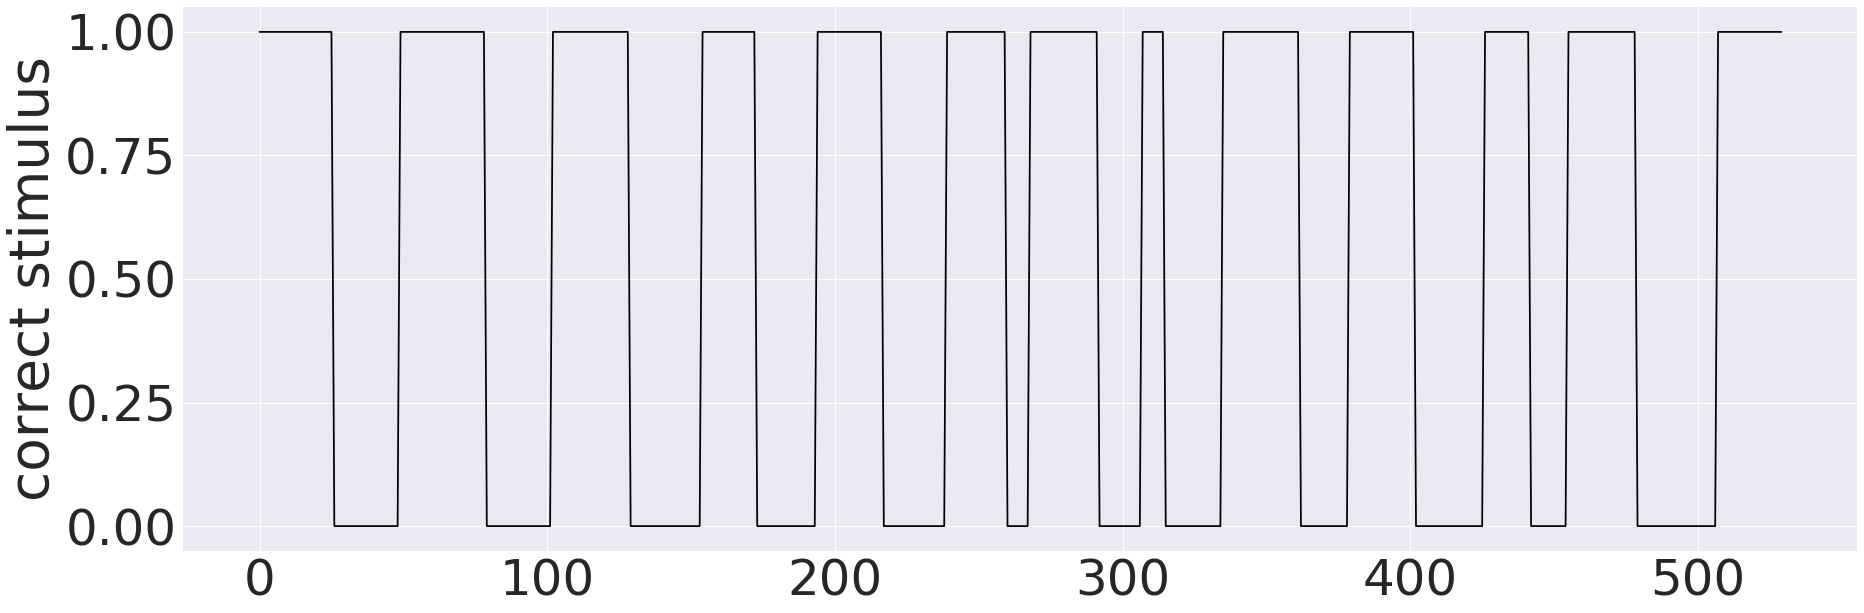

In [26]:
plt.plot(all_sim_data.stimulus[(all_sim_data.subj_idx == 0) & (all_sim_data.cond == 'lc')], 'k')
plt.ylabel('correct stimulus')

In [ ]:
#learning signals
learning_signals =['cpp:C(cond)','B:C(cond)']
B = learning_signals[1]
cpp = learning_signals[0]
#targets
targets  = [ 'v ~ ', 'a ~ ', 't ~ ']
include=['v', 'a', 't']
v = targets[0]
a = targets[1]
tr = targets[2]

n_samples, n_burned_samples, n_thin = 2000, 1000, 5


In [ ]:
v+B, a+cpp

In [ ]:
#first just fit parameters (not regression) to make sure that coding is correct
#should recover gen. model
test_stim_model_avt = hddm.HDDMStimCoding(all_sim_data, stim_col='stimulus', split_param='v', 
                                      depends_on={'a': 'cond', 'v':'cond', 't': 'cond'})
test_stim_model_a = hddm.HDDMStimCoding(all_sim_data, stim_col='stimulus', split_param='v', 
                                      depends_on={'a': 'cond'})
test_stim_model_v = hddm.HDDMStimCoding(all_sim_data, stim_col='stimulus', split_param='v', 
                                      depends_on={'v': 'cond'})
test_stim_model_t = hddm.HDDMStimCoding(all_sim_data, stim_col='stimulus', split_param='v', 
                                      depends_on={'t': 'cond'})

In [ ]:
test_stim_model_azt = hddm.HDDMStimCoding(all_sim_data, stim_col='stimulus', split_param='v', 
                                      depends_on={'a': 'cond', 'z': 'cond', 't': 'cond'})

In [ ]:
test_stim_model_avt.find_starting_values()
test_stim_model_a.find_starting_values()
test_stim_model_v.find_starting_values()
test_stim_model_t.find_starting_values()

test_stim_model_azt.find_starting_values()

In [ ]:
test_stim_model_avt.sample(n_samples, burn=n_burned_samples, thin=n_thin)
test_stim_model_a.sample(n_samples, burn=n_burned_samples, thin=n_thin)
test_stim_model_v.sample(n_samples, burn=n_burned_samples, thin=n_thin)
test_stim_model_t.sample(n_samples, burn=n_burned_samples, thin=n_thin)

In [ ]:
test_stim_model_azt.sample(n_samples, burn=20)

[Text(0,0.5,'DIC')]

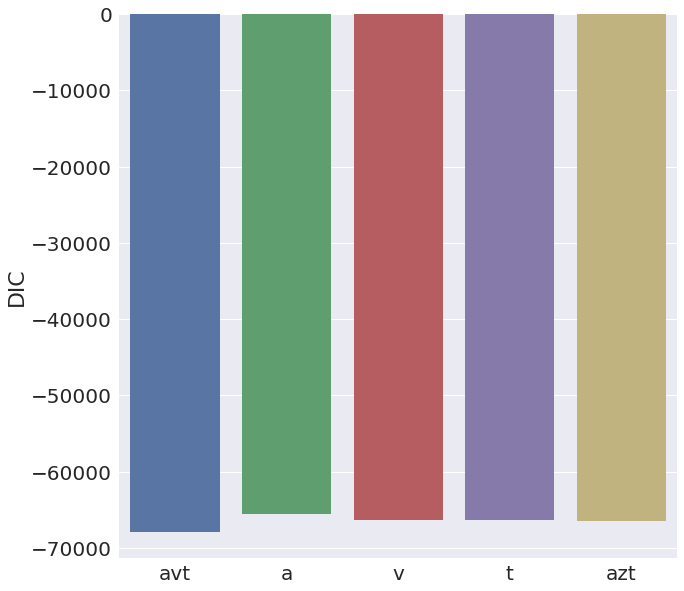

In [34]:
test_stim_coding_dics=[test_stim_model_avt.dic, test_stim_model_a.dic,
test_stim_model_v.dic, test_stim_model_t.dic, test_stim_model_azt.dic]
test_stim_coding_m_names=['avt', 'a', 'v', 't', 'azt']

sns.set(font_scale=2)  
plt.figure(figsize=(10,10))
ax=sns.barplot(test_stim_coding_m_names, test_stim_coding_dics)
ax.set(ylabel='DIC')

In [35]:
test_stim_model_avt.print_stats()

/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/krista/ana

                      mean          std         2.5q          25q          50q          75q        97.5q       mc err
a(hc)             0.719721    0.0334629     0.655948     0.696533     0.719038      0.74397     0.785212   0.00073778
a(hv)             0.722804    0.0340162     0.656626     0.700518     0.723183     0.746083     0.790329   0.00070988
a(lc)             0.698257    0.0345587     0.630144     0.674681     0.698315     0.720736     0.767655  0.000753876
a(lv)             0.693296    0.0346295      0.62526     0.669211     0.693861     0.716856     0.761322  0.000885677
a_std             0.171412    0.0139216     0.147446      0.16179     0.170563      0.17932      0.20192  0.000288747
a_subj(hc).0      0.771148    0.0179435     0.737087     0.759192     0.770606     0.782707     0.806718  0.000375142
a_subj(hc).1      0.703752    0.0161164      0.67349     0.692155     0.703521     0.714584     0.736877  0.000457857
a_subj(hc).2      0.620618     0.014007     0.593675    

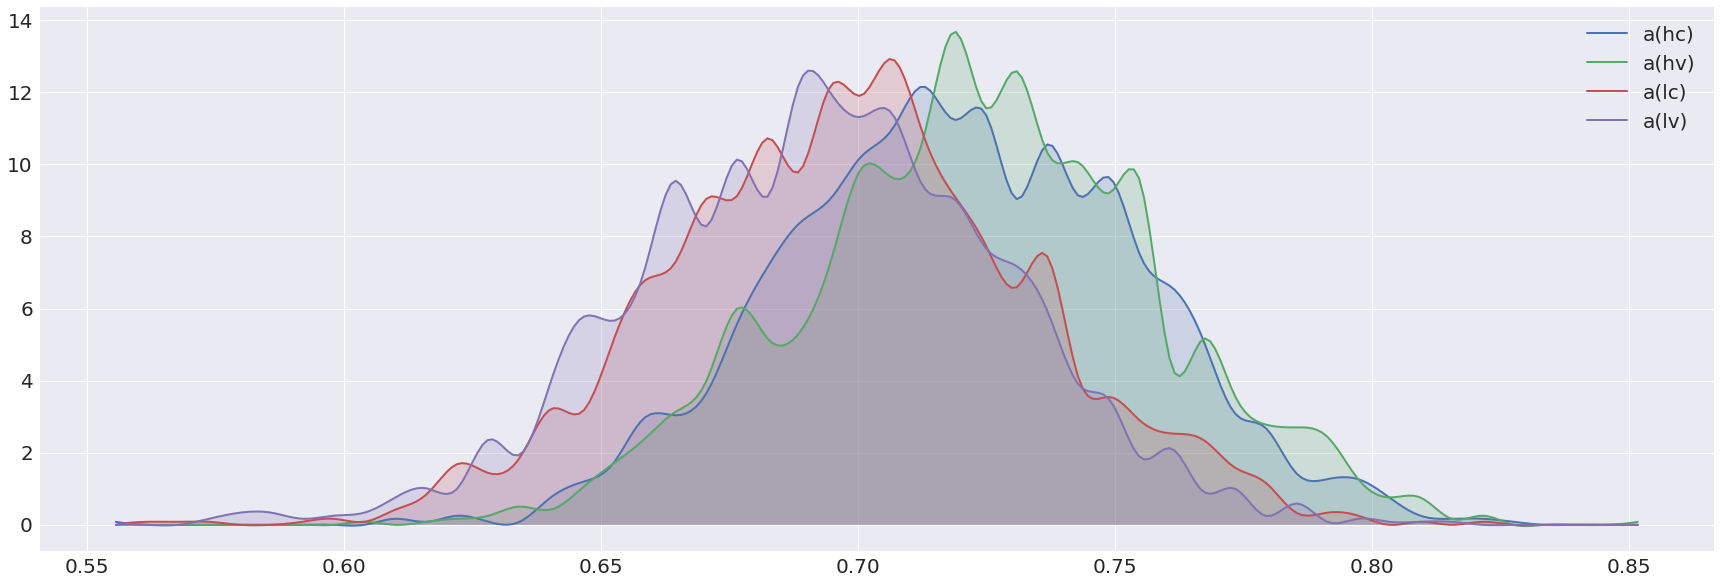

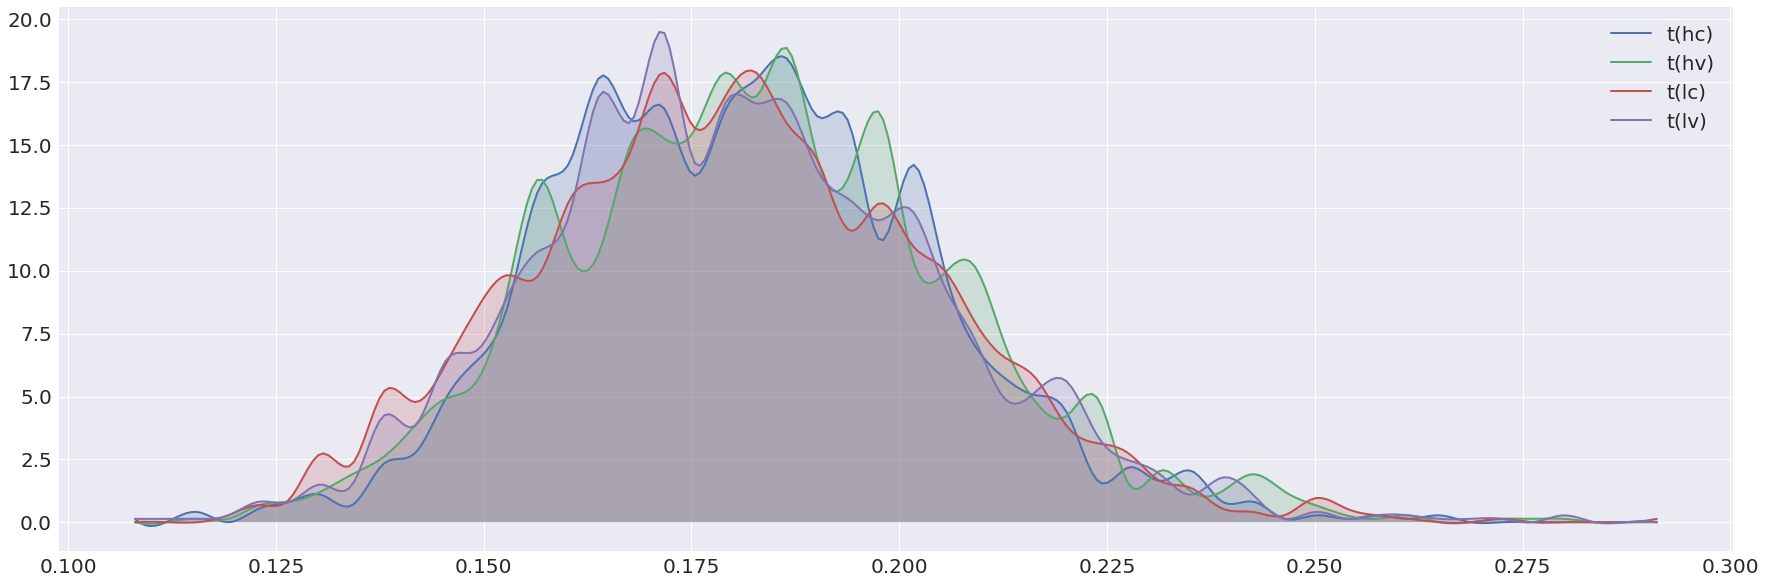

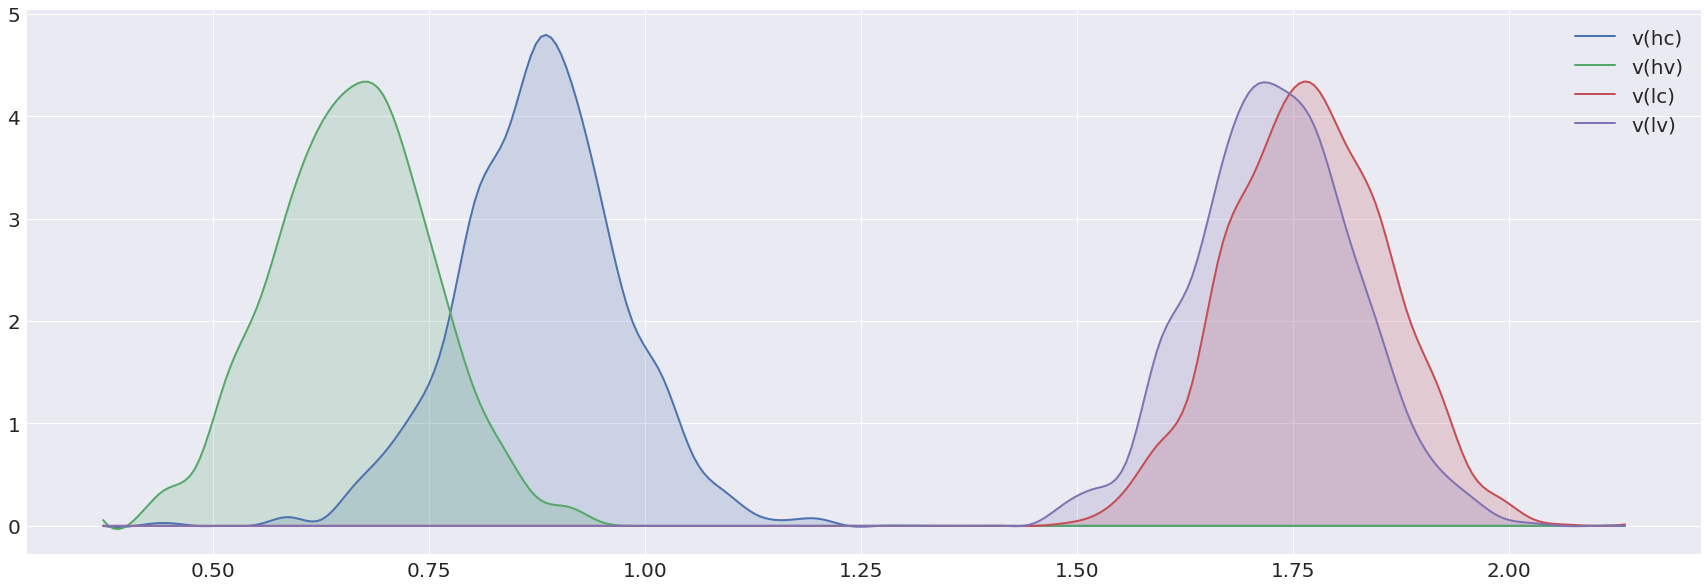

In [36]:
test_stim_model_avt.plot_posteriors_conditions()

In [37]:
test_stim_coding_dics[0] - test_stim_coding_dics

array([    0.        , -2323.69743316, -1561.11045998, -1610.5676666 ,
       -1375.85016527])

In [38]:
# #define v link function 
# #this will flip the sign of v based on the correct solution (stimulus column) 
# def v_link_func(x, data=all_sim_data):
#     stim = (np.asarray(dmatrix('0 + C(s,[[1],[-1]])', {'s':data.stimulus.ix[x.index]})))
#     return x * stim

In [39]:
a_cpp_reg =  {'model': a+cpp, 'link_func': lambda x:x}
a_B_reg =  {'model': a+B, 'link_func': lambda x:x}

t_B_reg =  {'model': tr+B, 'link_func': lambda x:x}
t_cpp_reg =  {'model': tr+cpp, 'link_func': lambda x:x}

v_B_reg =  {'model': v+B, 'link_func': lambda x:x}
v_cpp_reg =  {'model': v+cpp, 'link_func': lambda x:x}


## t -> cpp & v -> B 

In [40]:
t_cpp_v_B_subj_sim_reg = hddm.HDDMRegressor(all_sim_data,[t_cpp_reg, v_B_reg],include=include)
t_cpp_v_B_subj_sim_reg.sample(n_samples,burn=n_burned_samples,thin=n_thin, dbname='t_cpp_v_B_subj_sim_reg_TEST_STIMCODING.db', db='pickle')

Adding these covariates:
['t_Intercept', 't_cpp:C(cond)[hc]', 't_cpp:C(cond)[hv]', 't_cpp:C(cond)[lc]', 't_cpp:C(cond)[lv]']
Adding these covariates:
['v_Intercept', 'v_B:C(cond)[hc]', 'v_B:C(cond)[hv]', 'v_B:C(cond)[lc]', 'v_B:C(cond)[lv]']


/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/pymc/Node.py:403: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  self.__name__ = input['__name__']


 [-----------------100%-----------------] 20001 of 20000 complete in 255708.1 sec

/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/krista/ana

## v,a,t -> B 

In [41]:
v_a_t_B_subj_sim_reg = hddm.HDDMRegressor(all_sim_data,[v_B_reg, a_B_reg, t_B_reg], include=include)
v_a_t_B_subj_sim_reg.sample(n_samples,burn=n_burned_samples,thin=n_thin,dbname='v_a_t_B_subj_sim_reg_TEST_STIMCODING.db', db='pickle')

Adding these covariates:
['v_Intercept', 'v_B:C(cond)[hc]', 'v_B:C(cond)[hv]', 'v_B:C(cond)[lc]', 'v_B:C(cond)[lv]']
Adding these covariates:
['a_Intercept', 'a_B:C(cond)[hc]', 'a_B:C(cond)[hv]', 'a_B:C(cond)[lc]', 'a_B:C(cond)[lv]']
Adding these covariates:
['t_Intercept', 't_B:C(cond)[hc]', 't_B:C(cond)[hv]', 't_B:C(cond)[lc]', 't_B:C(cond)[lv]']


/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/pymc/Node.py:403: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  self.__name__ = input['__name__']


 [-----------------95%----------------  ] 19063 of 20000 complete in 232831.6 secHalting at iteration  19062  of  20000


/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/krista/ana

In [42]:
v_a_t_B_subj_sim_reg.dic 

nan

## t -> cpp & v,a -> B 

In [ ]:
v_a_B_t_cpp_subj_sim_reg = hddm.HDDMRegressor(all_sim_data,[v_B_reg, a_B_reg, t_cpp_reg], include=include)
v_a_B_t_cpp_subj_sim_reg.sample(n_samples,burn=n_burned_samples,thin=n_thin,dbname='v_a_B_t_cpp_subj_sim_reg_TEST_STIMCODING.db', db='pickle')

Adding these covariates:
['v_Intercept', 'v_B:C(cond)[hc]', 'v_B:C(cond)[hv]', 'v_B:C(cond)[lc]', 'v_B:C(cond)[lv]']
Adding these covariates:
['a_Intercept', 'a_B:C(cond)[hc]', 'a_B:C(cond)[hv]', 'a_B:C(cond)[lc]', 'a_B:C(cond)[lv]']
Adding these covariates:
['t_Intercept', 't_cpp:C(cond)[hc]', 't_cpp:C(cond)[hv]', 't_cpp:C(cond)[lc]', 't_cpp:C(cond)[lv]']


/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/pymc/Node.py:403: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  self.__name__ = input['__name__']


 [-----            15%                  ] 3085 of 20000 complete in 69868.3 sec

## v -> B & a -> cpp

In [ ]:
v_B_a_cpp_subj_obs_reg = hddm.HDDMRegressor(all_sim_data,[v_B_reg, a_cpp_reg], include=include)
v_B_a_cpp_subj_obs_reg.sample(n_samples,burn=n_burned_samples,thin=n_thin,dbname='v_B_a_cpp_subj_obs_reg_TEST_STIMCODING.db', db='pickle')

## v -> cpp & a -> B

In [ ]:
v_cpp_a_B_subj_obs_reg = hddm.HDDMRegressor(all_sim_data,[v_cpp_reg, a_B_reg], include=include)
v_cpp_a_B_subj_obs_reg.sample(n_samples,burn=n_burned_samples,thin=n_thin, dbname='v_cpp_a_B_subj_sim_reg_TEST_RECODING.db', db='pickle')

In [ ]:
# v_B_cpp_a_subj_obs_reg.save('v_B_cpp_a_subj_sim_reg_TEST_choiceB')
# v_cpp_a_B_subj_obs_reg.save('v_cpp_a_B_subj_sim_reg_TEST_choiceB')

In [ ]:
dics = [t_cpp_v_B_subj_sim_reg.dic, v_a_t_B_subj_sim_reg.dic,
       v_a_B_t_cpp_subj_sim_reg.dic, v_B_a_cpp_subj_obs_reg.dic, v_cpp_a_B_subj_obs_reg.dic]
m_names = ['t_cpp_v_B', 'v_a_t_B', 'v_a_B_t_cpp',
          'v_B_a_cpp','v_cpp_a_B' ]

In [ ]:
dics

In [ ]:
# v_a_t_B_subj_sim_reg.get_traces()

In [ ]:
dics

In [ ]:
m_names

In [ ]:
min(dics)

In [ ]:
#'v_a_B_t_cpp' is winner so far

In [ ]:
plt.figure(figsize=(30,15))
sns.set(font_scale=3)  
plt.bar(m_names, dics)
plt.ylim(min(dics) - 40, max(dics) + 500)
plt.ylabel('DIC score')
plt.title('Stimulus coding sanity check: top 3 observed regressions + generative model')

In [ ]:
sns.set(font_scale=1.2)  
plt.figure(figsize=(60,30))
v_hc, v_hv, v_lc, v_lv = v_a_B_t_cpp_subj_sim_reg.nodes_db.ix[['v_B:C(cond)[hc]', 'v_B:C(cond)[hv]',
                                                                    'v_B:C(cond)[lc]', 'v_B:C(cond)[lv]'], 'node']


drift_fig=hddm.analyze.plot_posterior_nodes([v_hc, v_hv, v_lc, v_lv])

In [ ]:
# v_a_B_t_cpp_subj_sim_reg.print_stats()

In [ ]:
sns.set(font_scale=1.2)  
plt.figure(figsize=(60,30))
a_hc, a_hv, a_lc, a_lv = v_a_B_t_cpp_subj_sim_reg.nodes_db.ix[['a_B:C(cond)[hc]', 'a_B:C(cond)[hv]',
                                                                    'a_B:C(cond)[lc]', 'a_B:C(cond)[lv]'], 'node']


a_fig=hddm.analyze.plot_posterior_nodes([a_hc, a_hv, a_lc, a_lv])

In [ ]:
sns.set(font_scale=1.2)  
plt.figure(figsize=(60,30))
t_hc, t_hv, t_lc, t_lv = v_a_B_t_cpp_subj_sim_reg.nodes_db.ix[['t_cpp:C(cond)[hc]', 't_cpp:C(cond)[hv]',
                                                                    't_cpp:C(cond)[lc]', 't_cpp:C(cond)[lv]'], 'node']


t_fig=hddm.analyze.plot_posterior_nodes([t_hc, t_hv, t_lc, t_lv])

In [ ]:
dics_diff = np.diff(dics)
print(dics_diff)

In [ ]:
?hddm.HDDMRegressor

In [ ]:
v_a_B_t_cpp_subj_sim_reg.plot_posteriors(plot_subjs=True)

In [ ]:
min(dics)

In [ ]:
dics

In [ ]:
# model_names_header = ', '.join(m_names)
# print_dics = np.column_stack(dics)
# np.savetxt(write_dir+'sim_test_gen_model.csv', print_dics, header=model_names_header, delimiter=',',comments='')

In [ ]:
v_B_cpp_a_subj_obs_reg.plot_posteriors()

In [ ]:
v_cpp_a_B_subj_obs_reg.plot_posteriors()